In [27]:
%load_ext autoreload
%autoreload 2
import idpet
import matplotlib.pyplot as plt
from idpet.ensemble import Ensemble
from idpet.ensemble_analysis import EnsembleAnalysis
from idpet.visualization import *
from idpet.utils import set_verbosity




set_verbosity("INFO")  # Change verbosity level to show more information when performing the analysis.

ens_codes = [
    # IDPConformerGenerator ensemble with not experimental bias.
    Ensemble('PED00156e001', database='ped'),
    # # # IDPConformerGenerator ensemble with secondary structure biased by chemical shift data.
    Ensemble('PED00157e001', database='ped'),
    
    # # # Ensemble generated with the ENSEMBLE method with experimental biases.
    Ensemble('PED00158e001', database='ped'),
    # # # IdpGAN ensemble, unbiased.

]

# data_dir = '/home/hamid/PED_Data_analysis/nikola'  # Add the path to a directory you wish in order to save the analysis
analysis = EnsembleAnalysis(ens_codes)
analysis.load_trajectories()
vis = Visualization(analysis);

Ensemble PED00156e001 already downloaded. Skipping.
File PED00156e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00156e001.
Ensemble PED00157e001 already downloaded. Skipping.
File PED00157e001.pdb already exists. Skipping extraction.


Trajectory file already exists for ensemble PED00157e001.
Ensemble PED00158e001 already downloaded. Skipping.
File PED00158e001.pdb already exists. Skipping extraction.
Trajectory file already exists for ensemble PED00158e001.
Loading trajectory for PED00156e001...
Loading trajectory for PED00157e001...
Loading trajectory for PED00158e001...


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
analysis.get_features_summary_dataframe()

,ensemble_code,n_residues,n_conformers,rg_mean,rg_std,asphericity_mean,asphericity_std,prolateness_mean,prolateness_std,sasa_mean,sasa_std,end_to_end_mean,end_to_end_std,flory_exponent,flory_exponent_err
0,PED00156e001,59,100,1.793522,0.587473,0.367338,0.269513,0.177178,0.142605,65.250198,8.240090,4.334907,2.394148,0.600232,0.001982
1,PED00157e001,59,100,1.908008,0.195550,0.480395,0.140734,0.149071,0.139984,64.016434,4.077925,4.339479,1.334982,0.555003,0.009554
2,PED00158e001,59,88,1.867024,0.187992,0.527425,0.130805,0.095781,0.119595,62.222599,4.569750,4.378268,1.174864,0.572923,0.007799


<Axes: ylabel='SASA (nm$^2$)'>

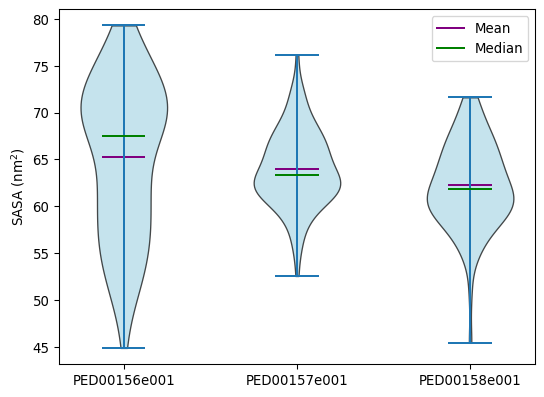

In [29]:
vis.global_sasa(
                violin_plot=True,
            
                summary_stat='both', 
                x_ticks_rotation=0)

End-to-End distances distribution plot saved to /home/hamid/.idpet/data/plots/e2e_distances_PED00156e001.png


<Axes: title={'center': 'Normalized End-to-End Distance ($R_{ee} / \\langle R_g \\rangle$) Distribution'}, ylabel='$R_{ee} / \\langle R_g \\rangle$'>

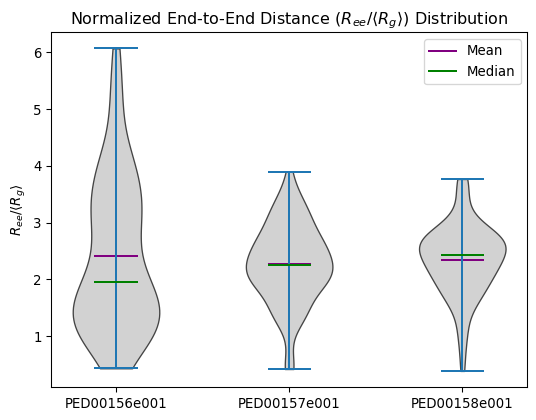

In [30]:
vis.end_to_end_distances(bins=10,rg_norm=True ,color='silver',violin_plot= True,multiple_hist_ax=True, hist_range=(0, 5), summary_stat='both', save=True, x_ticks_rotation=0)

Asphericity distribution plot saved to /home/hamid/.idpet/data/plots/asphericity_dist_PED00156e001.png


<Axes: ylabel='Asphericity'>

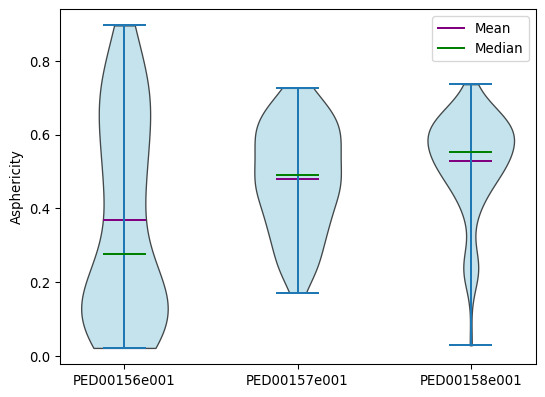

In [4]:
vis.asphericity(bins=5, violin_plot=True, multiple_hist_ax=True, hist_range=(0, 1), summary_stat='both', save=True, x_ticks_rotation=0)

<Axes: title={'center': 'Distribution of Alpha Angles'}, xlabel='Angle [rad]', ylabel='Density'>

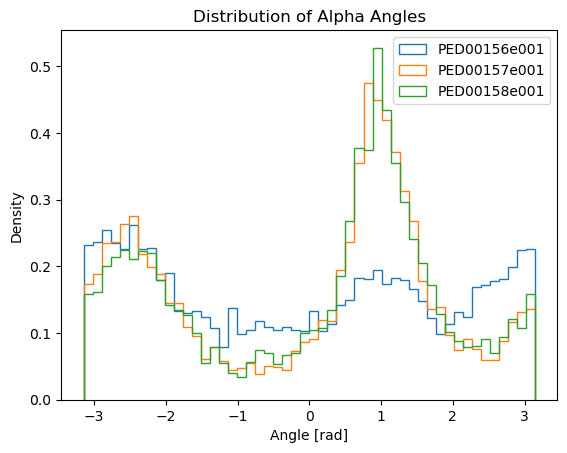

In [18]:
vis.alpha_angles()

Pearson coeff for PED00156e001 = 0.934
Pearson coeff for PED00157e001 = 0.303
Pearson coeff for PED00158e001 = 0.506
Rg vs. Asphericity plot saved to /home/hamid/.idpet/data/plots/Rg_vs_Asphericity_PED00156e001.png


<Axes: title={'center': 'Rg vs. Asphericity'}, xlabel='Radius of Gyration ($R_g$) [nm]', ylabel='Asphericity'>

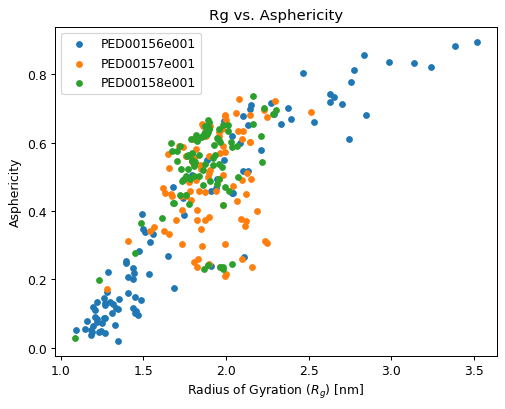

In [13]:
vis.rg_vs_asphericity(verbose=False, save=True, dpi=89, size=20)

<Axes: title={'center': 'Helix Content per Residue in the Ensemble'}, xlabel='Residue Index', ylabel='Relative Content of Helix'>

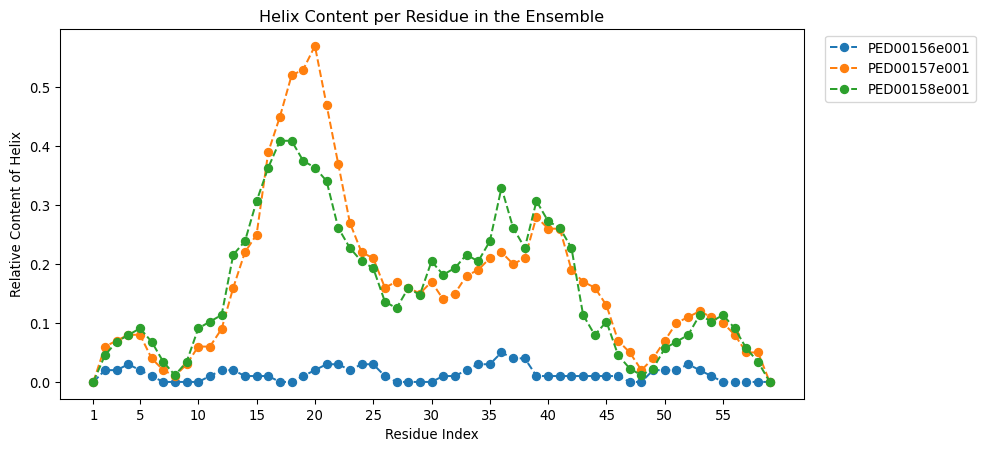

In [20]:
vis.relative_dssp_content(dssp_code='H',auto_xticks=False ,xtick_interval=5, dpi=96, save=True, figsize=(6,3))

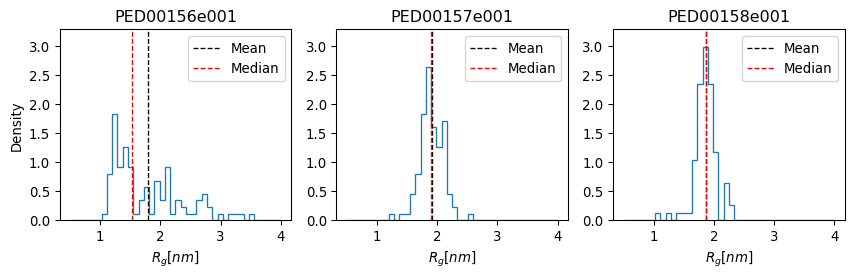

In [55]:
vis.radius_of_gyration(violin_plot=False, multiple_hist_ax=True ,hist_range=(0.5,4) ,summary_stat='both', bins=40);

# Ensemble: PED00423e001
features: (1000, 4095)
# Ensemble: PED00424e001
features: (1000, 4095)
# Ensemble: PED00160e001
features: (500, 4095)
# Ensemble: PED00487e002
features: (100, 4095)
Distance maps saved to /home/hamid/.idpet/data/plots/dist_both.png


[<Axes: title={'center': 'PED00423e001 CA'}, xlabel='j', ylabel='i'>,
 <Axes: title={'center': 'PED00423e001 COM'}, xlabel='j', ylabel='i'>,
 <Axes: title={'center': 'PED00424e001 CA'}, xlabel='j', ylabel='i'>,
 <Axes: title={'center': 'PED00424e001 COM'}, xlabel='j', ylabel='i'>,
 <Axes: title={'center': 'PED00160e001 CA'}, xlabel='j', ylabel='i'>,
 <Axes: title={'center': 'PED00160e001 COM'}, xlabel='j', ylabel='i'>,
 <Axes: title={'center': 'PED00487e002 CA'}, xlabel='j', ylabel='i'>,
 <Axes: title={'center': 'PED00487e002 COM'}, xlabel='j', ylabel='i'>]

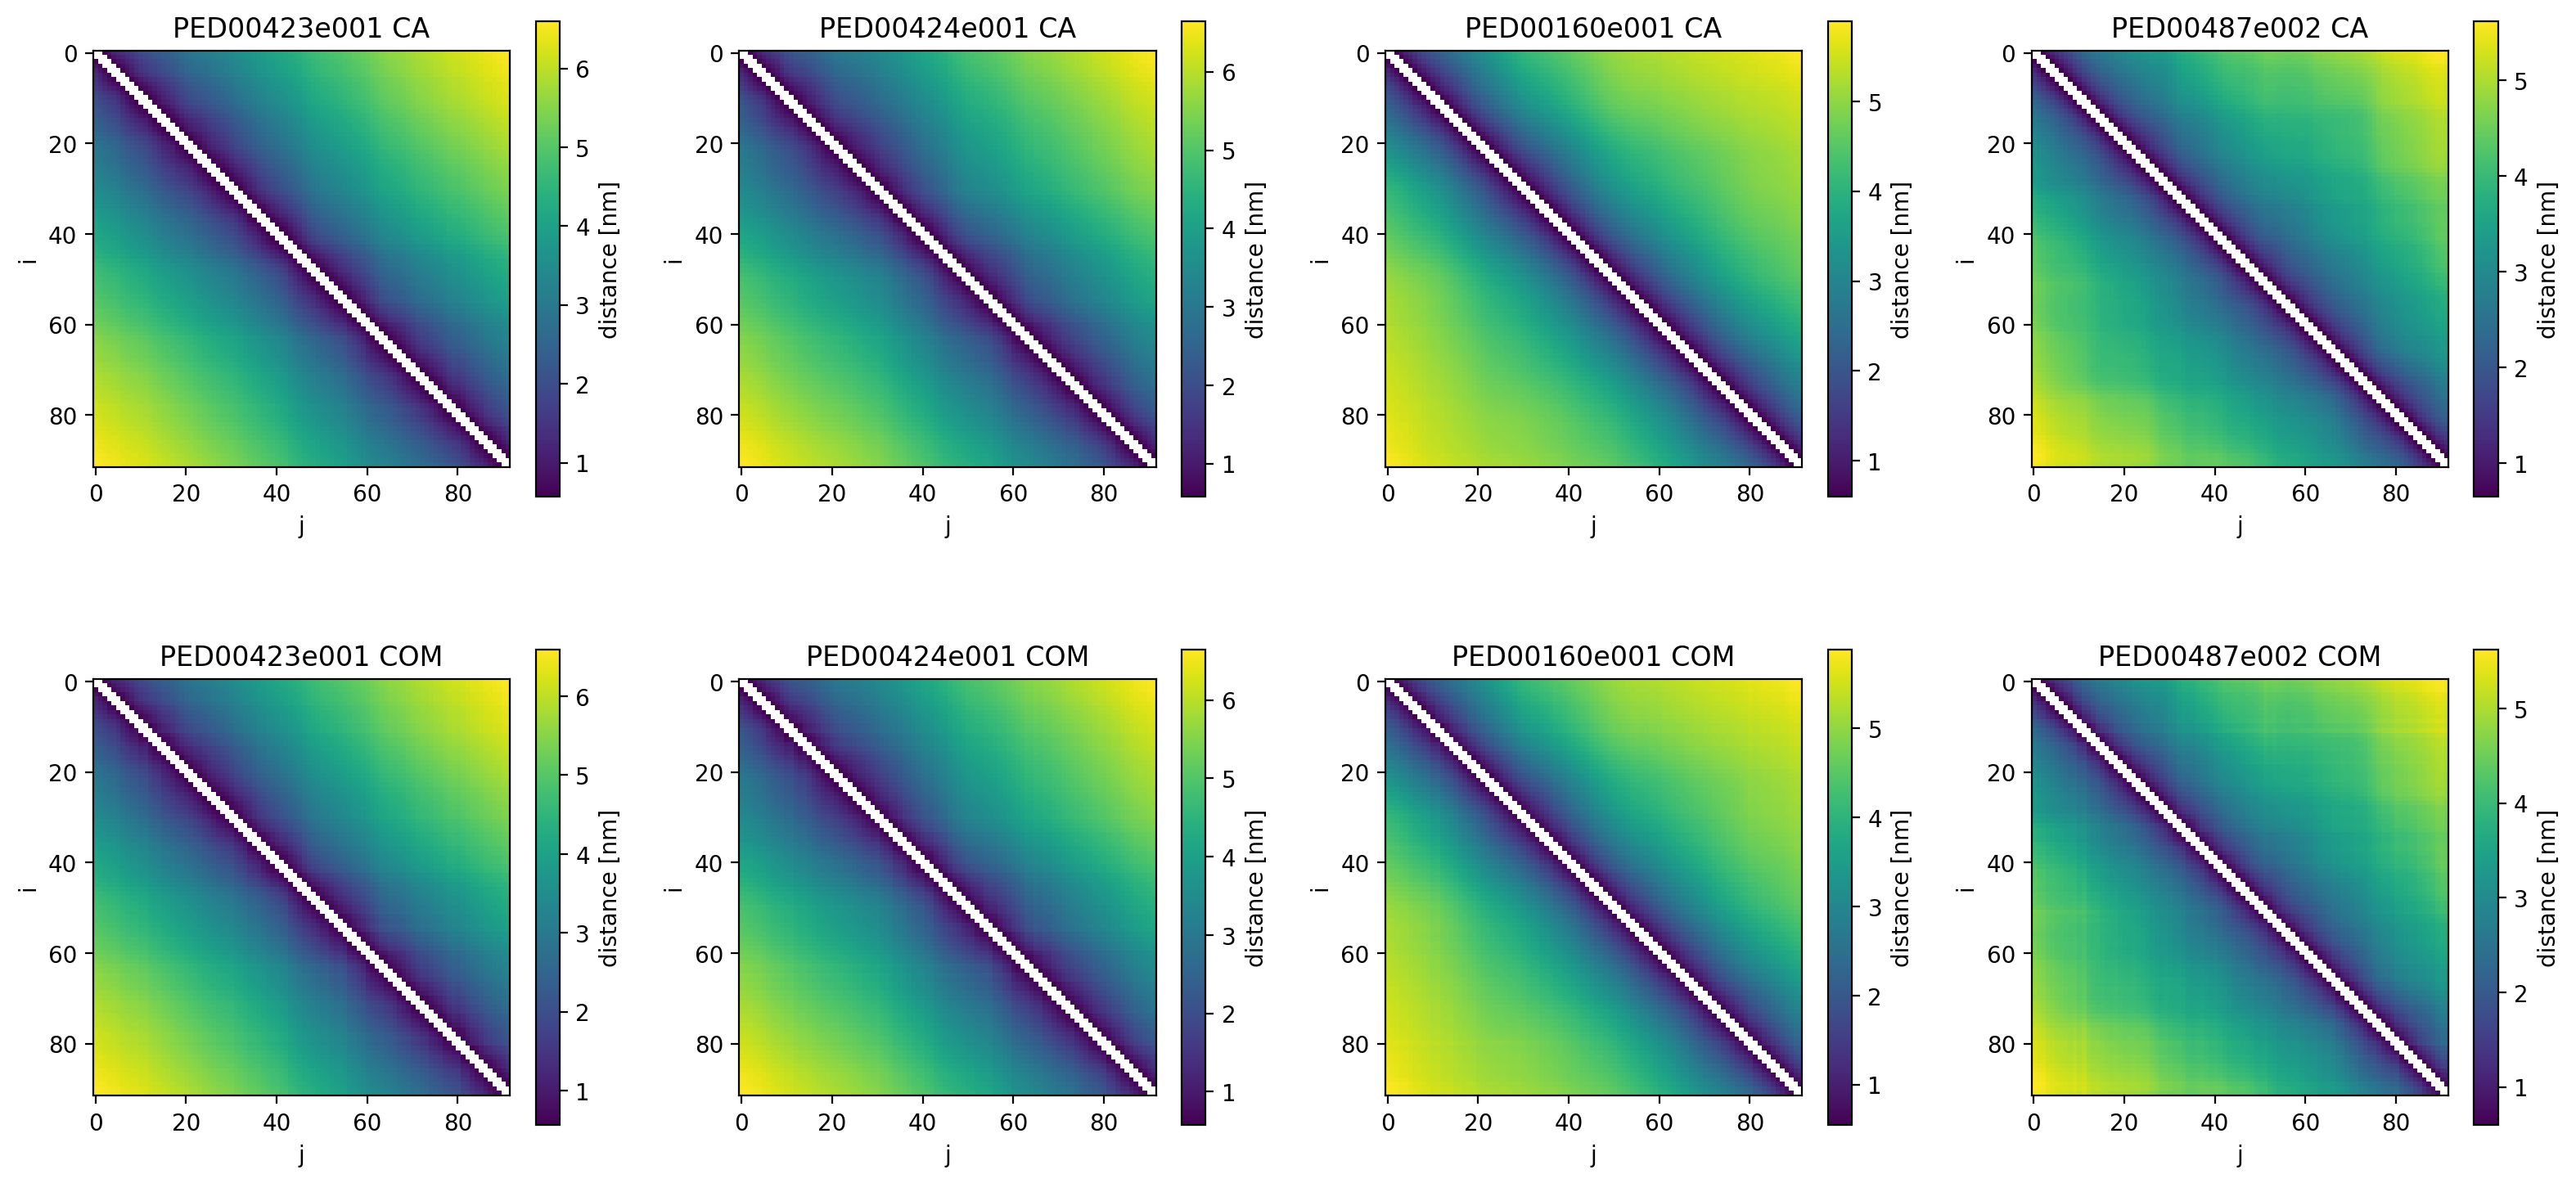

In [24]:
vis.distance_maps(min_sep=2,max_sep=None, distance_type='both', dpi=200,inverse=False ,save=True, get_names=True, color='viridis')


<Axes: title={'center': 'Prolateness Distribution'}, ylabel='Prolateness'>

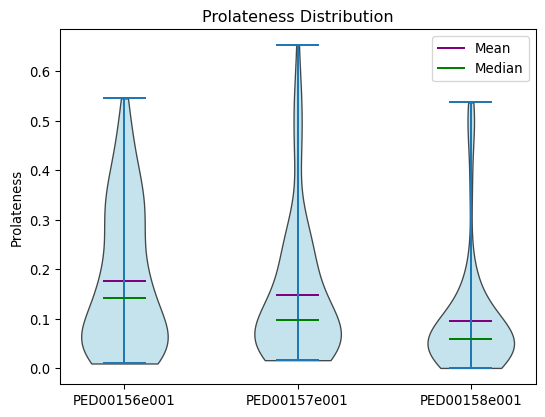

In [10]:
vis.prolateness(violin_plot=True, summary_stat='both', x_ticks_rotation=0)

Contact probability map saved to /home/hamid/.idpet/data/plots/contact_prob_PED00156e001.png


array([<Axes: title={'center': 'PED00156e001'}, xlabel='j', ylabel='i'>,
       <Axes: title={'center': 'PED00157e001'}, xlabel='j', ylabel='i'>,
       <Axes: title={'center': 'PED00158e001'}, xlabel='j', ylabel='i'>],
      dtype=object)

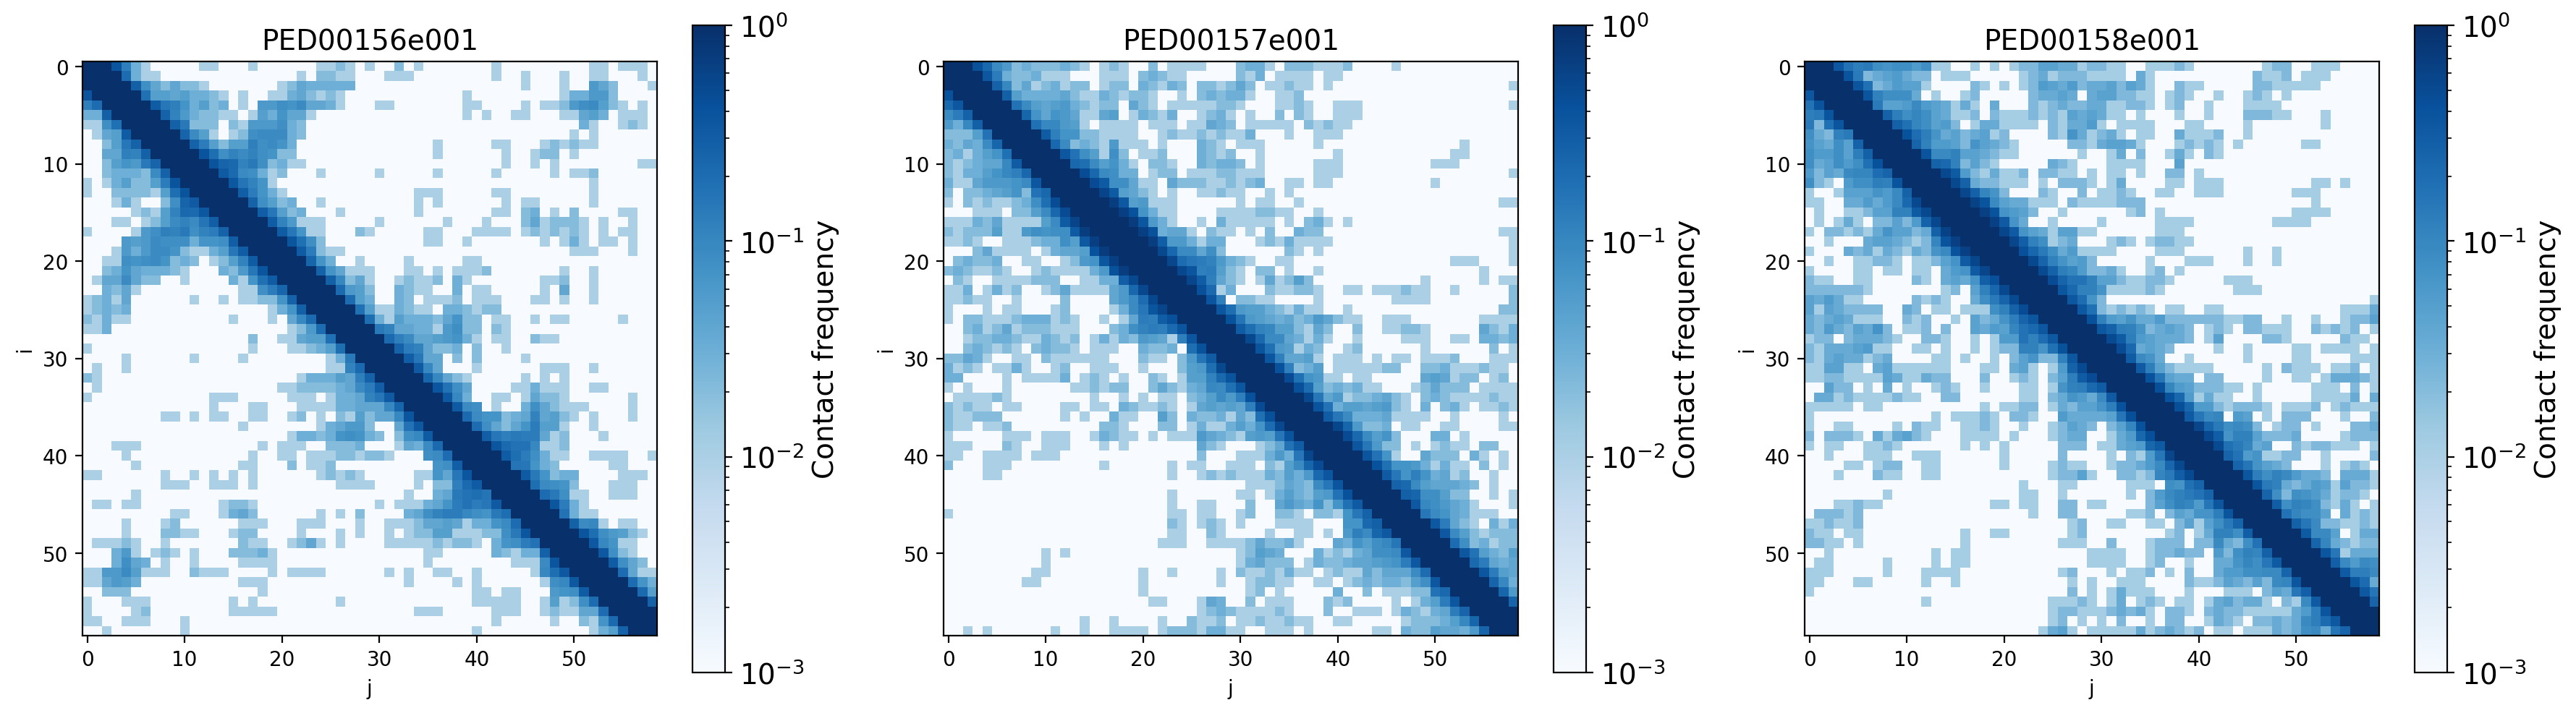

In [15]:
vis.contact_prob_maps(avoid_zero_count=True, dpi=200, save=True, log_scale=True, color='Blues', threshold=0.7)

Ramachandran plot saved to /home/hamid/.idpet/data/plots/ramachandran_PED00156e001.png


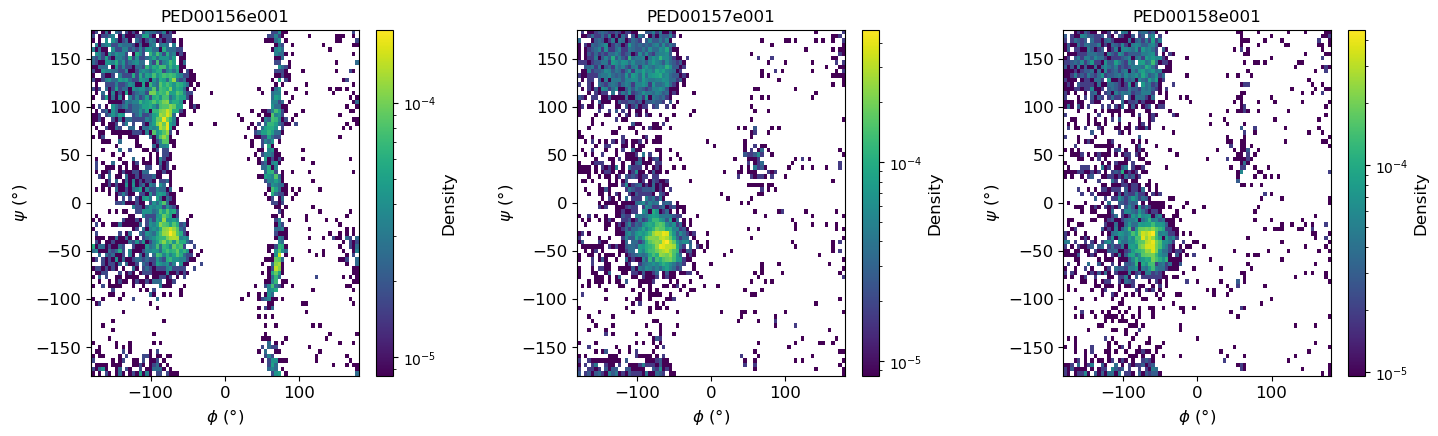

In [17]:

vis.ramachandran_plots(two_d_hist=True ,dpi=200, save=True, color='viridis', bins=(-180, 180, 80), log_scale=True);

Site-specific flexibility plot saved to /home/hamid/.idpet/data/plots/ss_flexibility_PED00156e001.png


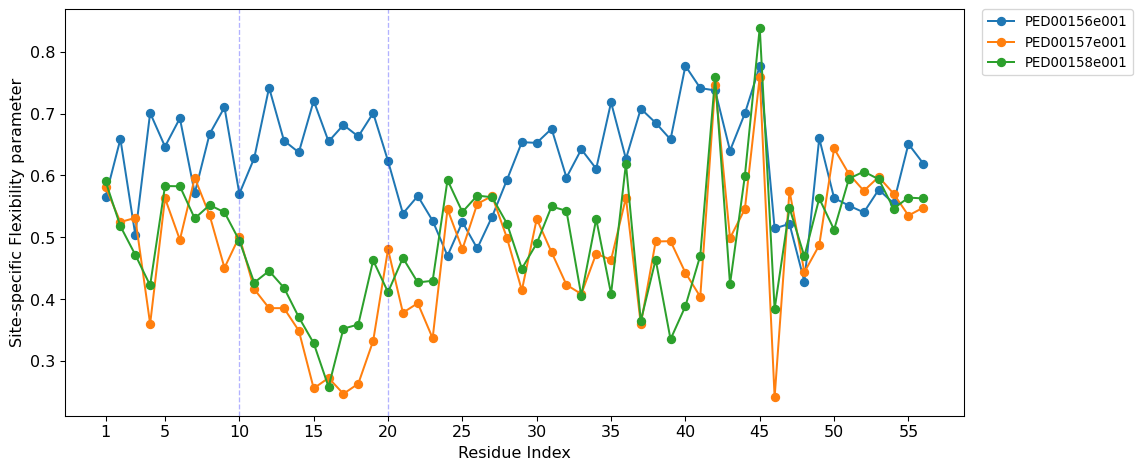

In [21]:
vis.site_specific_flexibility(pointer=[10,20], figsize=(12, 5),auto_xticks=False ,xtick_interval=5, save=True);

Site-specific order parameter plot saved to /home/hamid/.idpet/data/plots/ss_order_PED00156e001.png


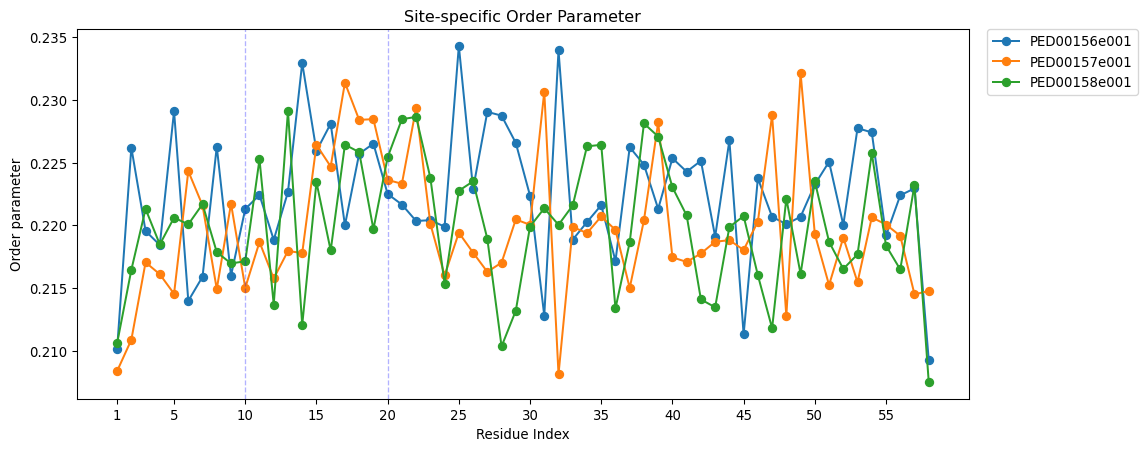

In [24]:
vis.site_specific_order(pointer=[10,20],auto_xticks=False,xtick_interval=5 ,figsize=(12, 5), save=True);

Local SASA plot saved to /home/hamid/.idpet/data/plots/local_sasa_PED00156e001.png


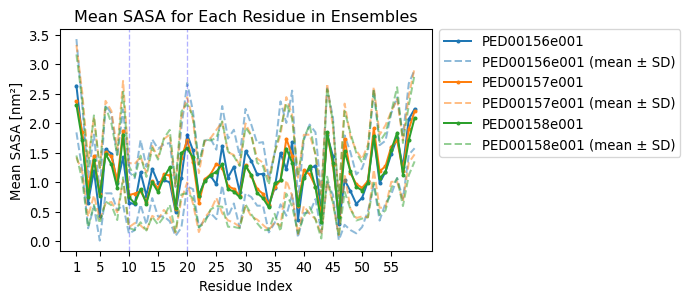

In [286]:
vis.per_residue_mean_sasa(auto_xticks=False, xtick_interval=5, figsize=(5, 3),size=2 ,dpi=96, save=True, pointer=[10, 20], probe_radius=0.28
                          , n_sphere_points=960);

Saved histogram grid to /home/hamid/.idpet/data/plots/hist_grid_PED00156e001.png


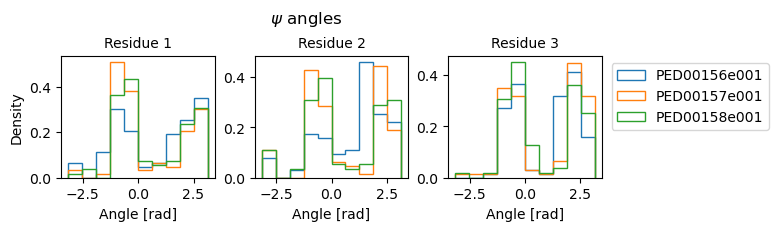

In [287]:
vis.plot_histogram_grid(feature='psi',n_cols=3, n_rows=1, ids=[1,2,3], dpi=100, save=True);

Saved Ramachandran grid to /home/hamid/.idpet/data/plots/rama_grid_PED00156e001.png


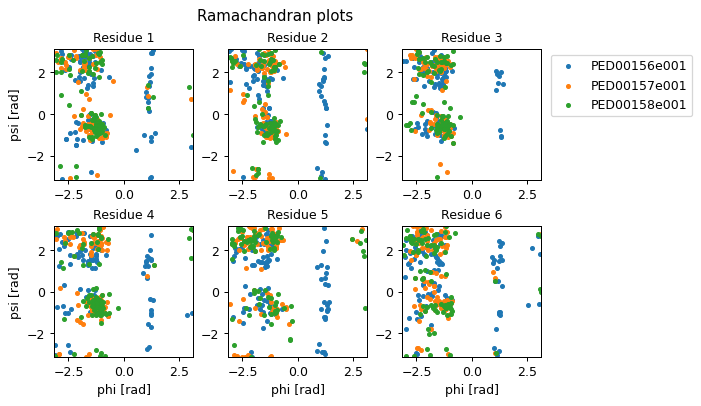

In [130]:
vis.plot_rama_grid(ids=[1,2,3,4,5,6], save=True );

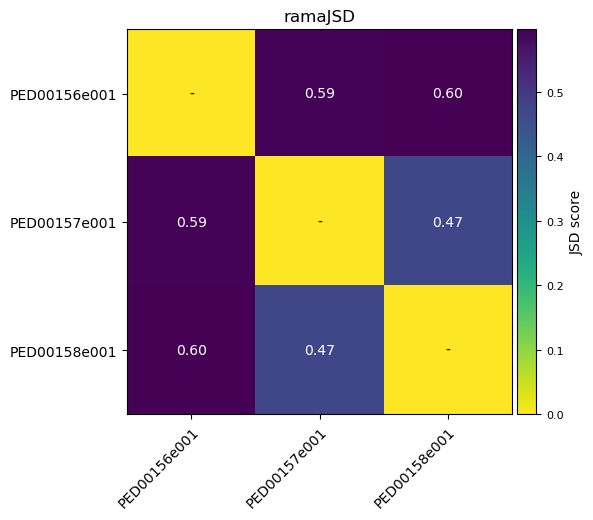

In [31]:
vis.comparison_matrix(score='ramaJSD');

Performing feature extraction for Ensemble: PED00156e001.
Transformed ensemble shape: (100, 114)
Performing feature extraction for Ensemble: PED00157e001.
Transformed ensemble shape: (100, 114)
Performing feature extraction for Ensemble: PED00158e001.
Transformed ensemble shape: (88, 114)
Concatenated featurized ensemble shape: (288, 114)
tsne is running...


Best Perplexity: 100
Best Number of Clusters: 2
Silhouette Score Low Dimensional: 0.40601295232772827
Silhouette Score High Dimensional: 0.03429700434207916
Silhouette Score Product: 0.013925028033554554
Reduced dimensionality ensemble shape: (100, 2)
Reduced dimensionality ensemble shape: (100, 2)
Reduced dimensionality ensemble shape: (88, 2)


t-SNE scatter plot saved to /home/hamid/.idpet/data/plots/tsne_scatter_rg.png


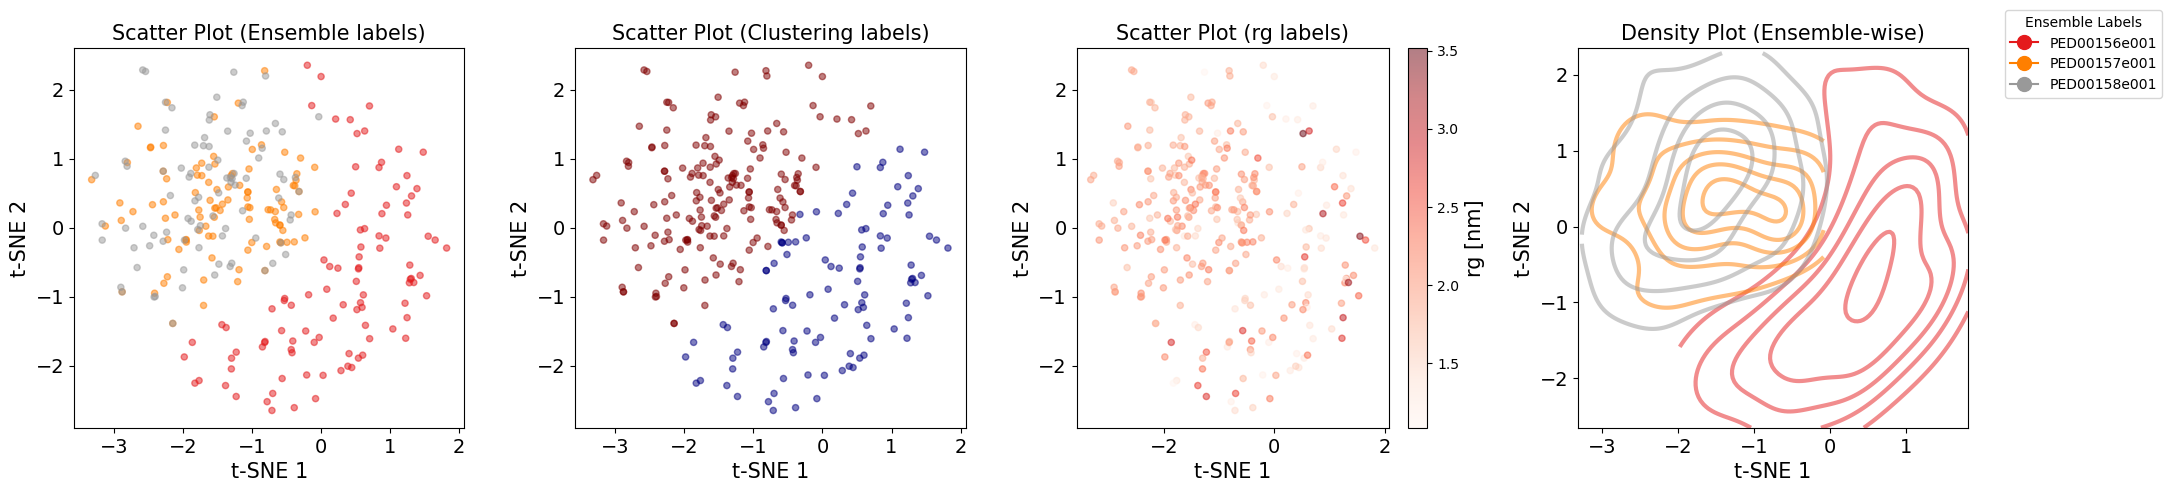

In [32]:

analysis.extract_features(featurization='phi_psi')  # Extract features using the CA distance method.;
analysis.reduce_features(
    method='tsne',
    perplexity_vals=[10, 20,  50, 100],
    circular=True,
    range_n_clusters=range(2,10,1),
    random_state=2025,
    n_components=2
);
vis.dimensionality_reduction_scatter(
    color_by="rg",  # Color the snapshots according to a molecular feature, here end-to-end distance.
    kde_by_ensemble=True,   # In the subplot with KDE, show data for the individual ensembles. 
    plotly=True, 
    dpi = 100,
    n_components=2,  # Number of components to plot, here 2D.
    size=20,        
    save=True,
    cmap_label='Reds'  # Colormap for the scatter plot.
);

Performing feature extraction for Ensemble: PED00156e001.


Transformed ensemble shape: (100, 1653)
Performing feature extraction for Ensemble: PED00157e001.
Transformed ensemble shape: (100, 1653)
Performing feature extraction for Ensemble: PED00158e001.
Transformed ensemble shape: (88, 1653)
Concatenated featurized ensemble shape: (288, 1653)
UMAP is running...
/home/hamid/anaconda3/envs/ped/lib/python3.11/site-packages/umap/umap_.py:1849: UserWarning:

custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method, define a distance function that returns a tuple of (distance [float], gradient [np.array])

/home/hamid/anaconda3/envs/ped/lib/python3.11/site-packages/umap/umap_.py:1849: UserWarning:

custom distance metric does not return gradient; inverse_transform will be unavailable. To enable using inverse_transform method, define a distance function that returns a tuple of (distance [float], gradient [np.array])

/home/hamid/anaconda3/envs/ped/lib/python3.11/site-packages/um

/home/hamid/Desktop/Ensemble_tool/EnsembleTools/dpet/visualization.py:961: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

3D scatter plot saved to /home/hamid/.idpet/data/plots/tSNE_landscape.png


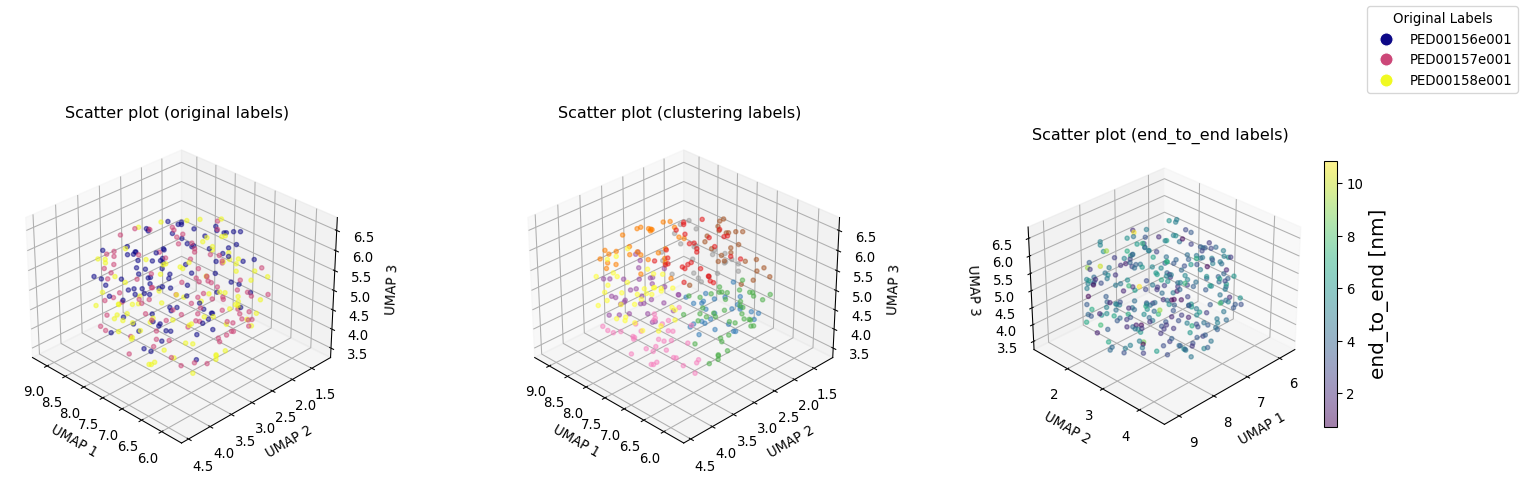

In [102]:

analysis.extract_features(featurization='tr_omega');
analysis.reduce_features(
    method='umap',
    circular=True,
    n_neighbors=[20, 30, 40],
    range_n_clusters=[2,3,4,5,6,7,8,9,10],
    n_components=3,

);
vis.dimensionality_reduction_scatter(
    color_by="end_to_end", n_components=3, plotly=True, kde_by_ensemble=True,save=True ,cmap_label='viridis'
);

Performing feature extraction for Ensemble: PED00156e001.


Transformed ensemble shape: (100, 1653)
Performing feature extraction for Ensemble: PED00157e001.
Transformed ensemble shape: (100, 1653)
Performing feature extraction for Ensemble: PED00158e001.
Transformed ensemble shape: (88, 1653)
Concatenated featurized ensemble shape: (288, 1653)
Concatenated featurized ensemble shape: (288, 1653)
Reduced dimensionality ensemble shape: (100, 10)
Reduced dimensionality ensemble shape: (100, 10)
Reduced dimensionality ensemble shape: (88, 10)
PCA cumulative explained variance plot saved to /home/hamid/.idpet/data/plots/PCA_variancetr_omegaPED00156e001.png


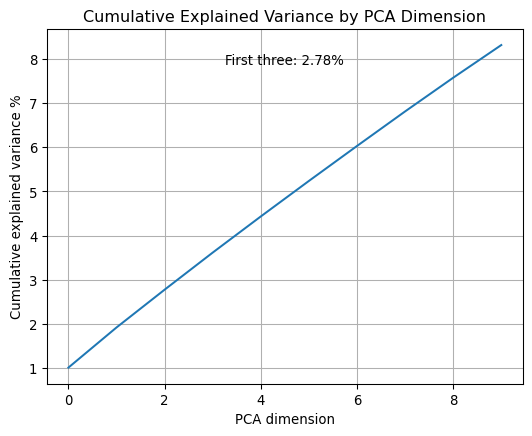

In [101]:
analysis.extract_features(featurization='tr_omega')

analysis.reduce_features(
    method='pca',
    n_components=10  # Maximum number of dimensions to use.
);
vis.pca_cumulative_explained_variance(save=True);

PCA 2D landscapes saved to /home/hamid/.idpet/data/plots/PCA_2d_landscapes_ca_distPED00156e001.png


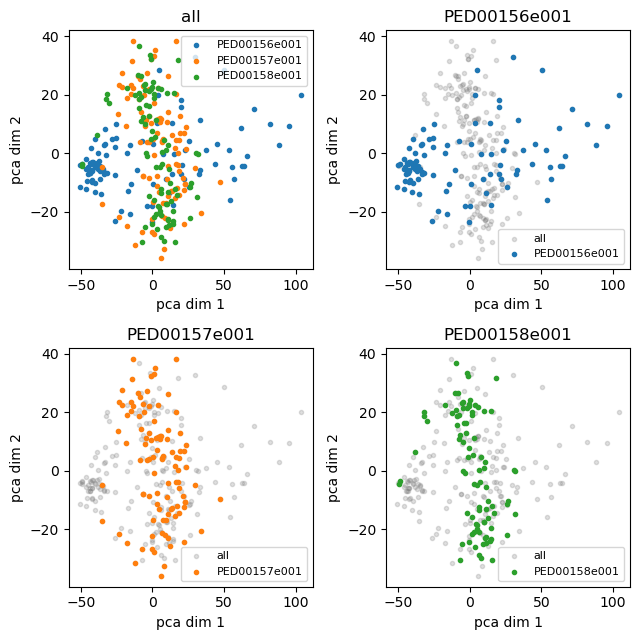

In [69]:
sel_dims = [0,1, 2] # change the name of dims?
fig, ax = plt.subplots(2, 2, figsize=(6.5, 6.5))
vis.pca_2d_landscapes(sel_components=sel_dims, ax=ax, save=True, dpi=90);
fig.tight_layout()

PCA 1D histograms saved to /home/hamid/.idpet/data/plots/PCA_histca_distPED00156e001.png


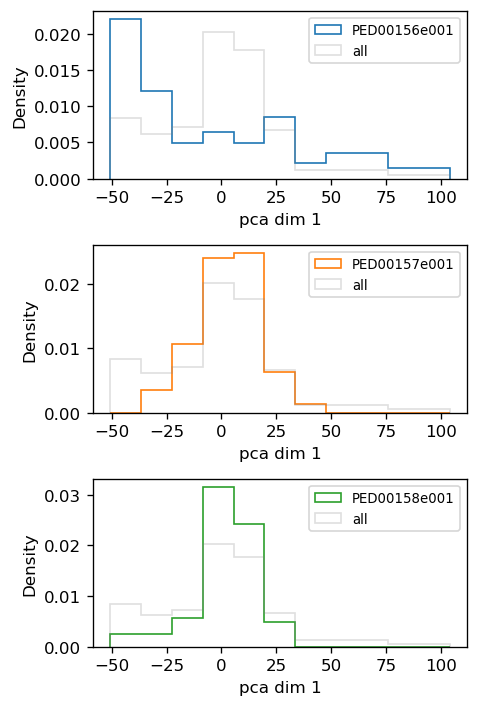

In [40]:
sel_dim = 0  # First principal component.
vis.pca_1d_histograms(sel_components=sel_dim, bins=12, save=True, dpi=120);

PCA residue correlation plot saved to /home/hamid/.idpet/data/plots/PCA_correlationca_distPED00156e001.png


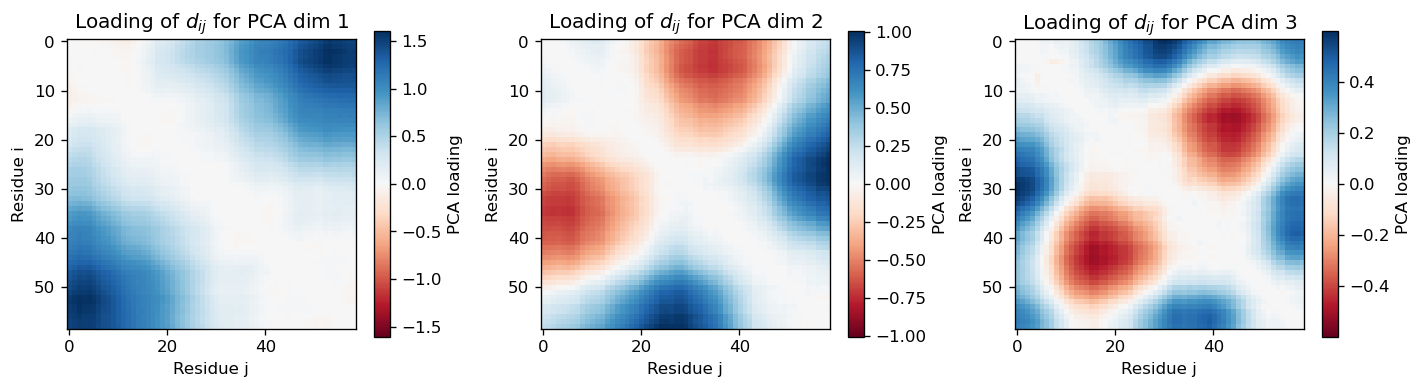

In [50]:
sel_dims = [0, 1, 2]
vis.pca_residue_correlation(sel_components=sel_dims, save=True, dpi=120, cmap='RdBu', scale_loadings=True);

PCA Rg correlation plot saved to /home/hamid/.idpet/data/plots/PCA_RGPED00156e001.png


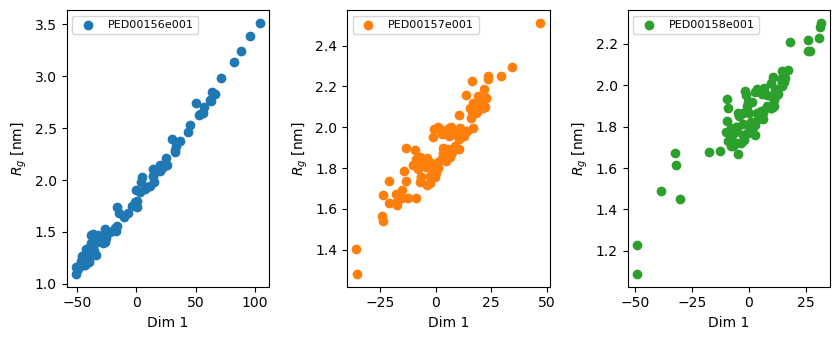

In [76]:
sel_dim = 0  # First principal component.
fig, ax = plt.subplots(1, 3, figsize=(8.5, 3.5))
vis.pca_rg_correlation(sel_components=sel_dim, ax=ax, save=True, dpi=100);
fig.tight_layout()

Performing feature extraction for Ensemble: PED00156e001.
Transformed ensemble shape: (100, 114)
Performing feature extraction for Ensemble: PED00157e001.
Transformed ensemble shape: (100, 114)
Performing feature extraction for Ensemble: PED00158e001.
Transformed ensemble shape: (88, 114)
Concatenated featurized ensemble shape: (288, 114)
Concatenated featurized ensemble shape: (288, 114)
Reduced dimensionality ensemble shape: (100, 10)
Reduced dimensionality ensemble shape: (100, 10)
Reduced dimensionality ensemble shape: (88, 10)
KPCA 2D landscapes saved to /home/hamid/.idpet/data/plots/KPCA_2d_landscapes_phi_psiPED00156e001.png


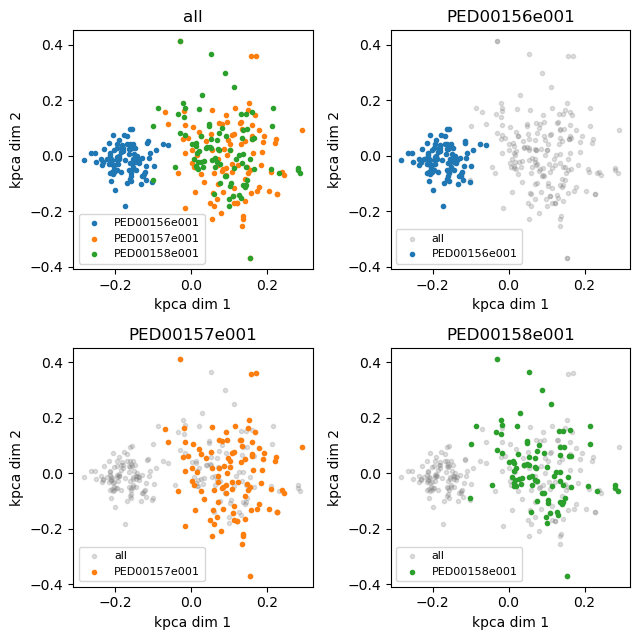

In [82]:
analysis.extract_features(featurization="phi_psi");
analysis.reduce_features(method="kpca", circular=True, n_components=10);
fig, ax = plt.subplots(2, 2, figsize=(6.5, 6.5))  # 2x2 subplots to show (1 + number of ensembles) plots.

vis.pca_2d_landscapes(
    sel_components=[0, 1],  # Show the first and second PCs.
    ax=ax,
    save= True         # Optionally provide a custom axes.
);
plt.tight_layout()

KPCA 1D histograms saved to /home/hamid/.idpet/data/plots/KPCA_histphi_psiPED00156e001.png


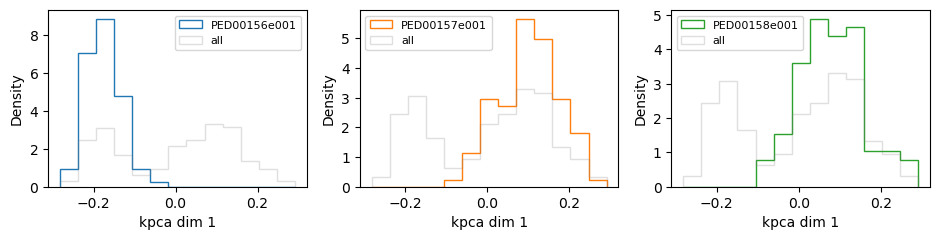

In [84]:
fig, ax = plt.subplots(1, 3, figsize=(9.5, 2.5))  # 1x3 subplots to show (number of ensembles) plots.
vis.pca_1d_histograms(
    sel_components=0,     # First PC.
    ax=ax,     # Again, provide custom axes.
    bins=14,
    save=True  # Number of histogram bins.
)
plt.tight_layout()